# Record Map

This notebook is intended to reproduce the map figure from the paper.

In [6]:
import pickle

import pyleoclim as pyleo
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import gridspec
from mpl_toolkits.basemap import Basemap

In [7]:
with open('../data/series_dict.pkl','rb') as handle:
    series_dict = pickle.load(handle)

with open('../data/pos_dict.pkl','rb') as handle:
    pos_dict = pickle.load(handle)

In [8]:
# Sort by latitude

lat_dict = {series.lat:series.label for series in series_dict.values()}

sort_index = np.sort(np.array(list(lat_dict.keys())))[::-1]
sort_label = [lat_dict[lat] for lat in sort_index]
series_dict = {label:series_dict[label] for label in sort_label} #Sort by latitude
pos_dict = {label:pos_dict[label] for label in sort_label}
lats = [series.lat for series in series_dict.values()]

ms = pyleo.MultipleGeoSeries([series for series in series_dict.values()])

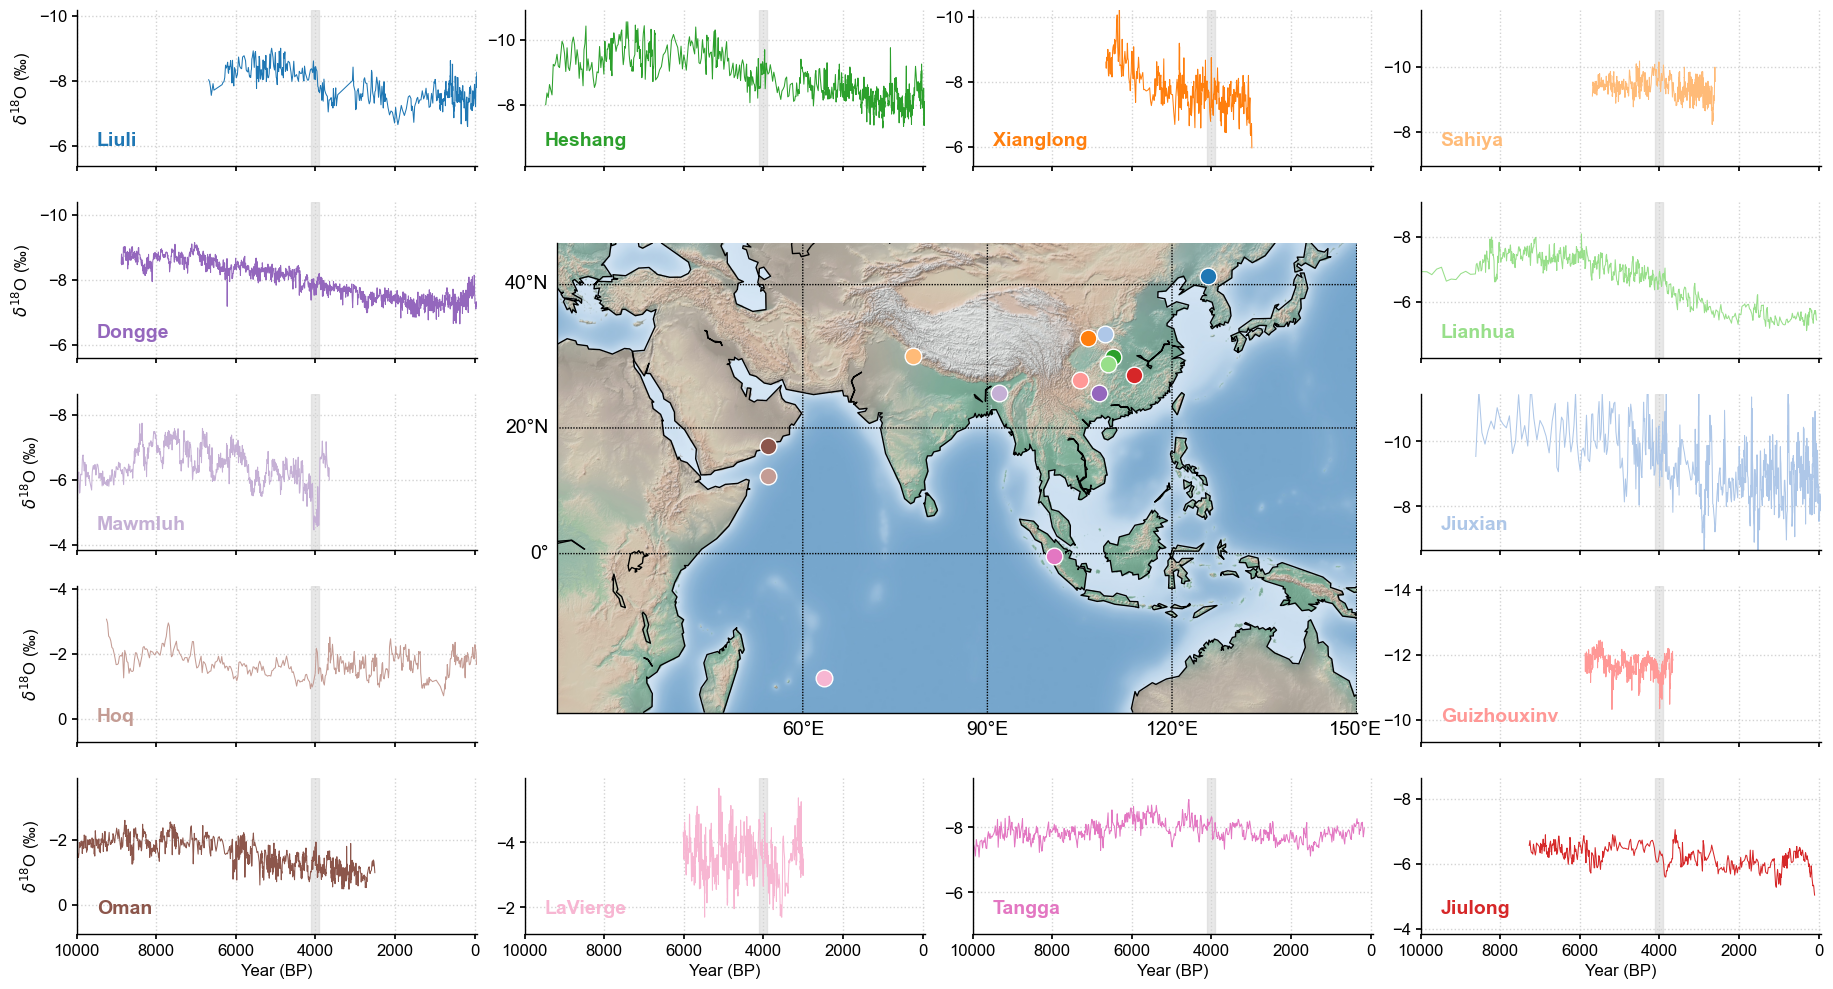

In [9]:
# Create a figure with a specified size
fig = plt.figure(figsize=(16, 12))

# Create a Basemap instance with specified projection and map boundaries
m = Basemap(projection='merc', llcrnrlat=-25, urcrnrlat=45, llcrnrlon=20, urcrnrlon=150, lat_ts=20, resolution='c')

# Add shaded relief to the map
m.shadedrelief(scale=0.5, zorder=0)

# Draw coastlines on the map
m.drawcoastlines()

# Draw parallels (latitude lines) on the map
m.drawparallels(np.arange(0., 61., 20.), labels=[1, 0, 0, 0], fontsize=14)

# Draw meridians (longitude lines) on the map
m.drawmeridians(np.arange(60., 151., 30.), labels=[0, 0, 0, 1], fontsize=14)

# Sort the longitude and latitude values based on the order of series_dict keys
lon_2k_sorted = [pos_dict[label]['lon'] for label in series_dict.keys()]
lat_2k_sorted = [pos_dict[label]['lat'] for label in series_dict.keys()]

# Convert longitude and latitude to map coordinates
x2, y2 = m(lon_2k_sorted, lat_2k_sorted)

# Define properties for text boxes
props = dict(boxstyle='round', facecolor='white', edgecolor='none', alpha=0.5)

# Create a color palette for the series
clrs = sns.color_palette('tab20', n_colors=len(ms.series_list))

# Plot the locations on the map
for i in range(14):
    m.plot(x2[i], y2[i], 'o', markersize=12, color=clrs[i], markeredgecolor='white', markeredgewidth=1)

# Adjust the subplot layout
plt.subplots_adjust(left=0.2, bottom=0.25, right=0.7, top=0.75, wspace=0, hspace=0)

# Create individual axes for each series
ax1 = fig.add_axes([-0.10, 0.76, 0.25, 0.13])  # Liuli, top center2
ax2 = fig.add_axes([0.74, 0.44, 0.25, 0.13])  # Jiuxian, bottom right2
ax3 = fig.add_axes([0.46, 0.76, 0.25, 0.13])  # Lianhua, top center1
ax4 = fig.add_axes([0.74, 0.76, 0.25, 0.13])  # Sahiya, top right1
ax5 = fig.add_axes([0.18, 0.76, 0.25, 0.13])  # Sahiya, top left1
ax6 = fig.add_axes([0.74, 0.6, 0.25, 0.13])  # Lianhua, right2
ax7 = fig.add_axes([0.74, 0.12, 0.25, 0.13])  # Jiulong, bottom right1
ax8 = fig.add_axes([0.74, 0.28, 0.25, 0.13])  # Guizhouxinv, right1
ax9 = fig.add_axes([-0.1, 0.6, 0.25, 0.13])  # Dongge, top left2
ax10 = fig.add_axes([-0.1, 0.44, 0.25, 0.13])  # Dark, bottom center2
ax11 = fig.add_axes([-0.1, .12, 0.25, 0.13])  # Guizhouxinv, bottom left2
ax12 = fig.add_axes([-0.1, 0.28, 0.25, 0.13])  # Hoq, top right2
ax13 = fig.add_axes([0.46, 0.12, 0.25, 0.13])  # Mawmluh, bottom center1
ax14 = fig.add_axes([0.18, 0.12, 0.25, 0.13])  # Hoq, bottom left1

# Store the axes in a list
axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14]

# Iterate over the series and plot them on the corresponding axes
for i, key in enumerate(series_dict.keys()):
    series = series_dict[key]
    axs[i].axvspan(4100, 3900, color='lightgrey', alpha=0.5)
    series.plot(color=clrs[i], linewidth=.75, ax=axs[i], legend=False)
    
    # Set x-label for specific series
    if key in ['LaVierge', 'Oman', 'Tangga', 'Jiulong']:
        axs[i].set_xlabel('Year (BP)', fontsize=12)
    else:
        axs[i].set_xlabel('')
        axs[i].set_xticklabels([])
    
    # Set tick parameters and grid style
    axs[i].tick_params(axis='both', which='major', labelsize=12)
    axs[i].grid(linestyle='dotted')
    
    # Set y-label for specific series
    if key in ['Oman', 'Liuli', 'Dongge', 'Mawmluh', 'Hoq']:
        axs[i].set_ylabel(u'$\delta^{18}$O (\u2030)', fontsize=12)
    else:
        axs[i].set_ylabel('')
    
    # Set x-axis and y-axis limits
    axs[i].set_xlim(-50, 10000)
    ymean = np.mean(series.value)
    axs[i].set_ylim(ymean - 2.4, ymean + 2.4)
    
    # Invert x-axis and y-axis
    axs[i].invert_xaxis()
    axs[i].invert_yaxis()
    
    # Set grid style and remove top and right spines
    axs[i].grid(linestyle='dotted')
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    
    # Add series label to the plot
    axs[i].text(0.05, 0.13, key, transform=axs[i].transAxes, fontsize=14, color=clrs[i], weight='bold')

In [10]:
pyleo.savefig(fig,'../figures/speleothem_timeseries_map.pdf')

Figure saved at: "../../figures/speleothem_timeseries_map.pdf"
